In [27]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()

In [28]:
amzn = pdr.get_data_yahoo('AMZN')

In [29]:
amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-12,48.797501,47.250000,48.349998,48.245499,188944000.0,48.245499
2017-06-13,49.224998,48.305000,48.899502,49.039501,91600000.0,49.039501
2017-06-14,49.516998,48.335499,49.429501,48.823502,79498000.0,48.823502
2017-06-15,48.286499,47.542999,47.935001,48.208500,107478000.0,48.208500
2017-06-16,49.987499,49.099998,49.799999,49.385502,229454000.0,49.385502


In [30]:
#store instantaneous rate of return in seperate series
amzn_close = amzn['Close']
amzn_return = round(np.log(amzn_close).diff() * 100, 2)
amzn_return.head()

Date
2017-06-12     NaN
2017-06-13    1.63
2017-06-14   -0.44
2017-06-15   -1.27
2017-06-16    2.41
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

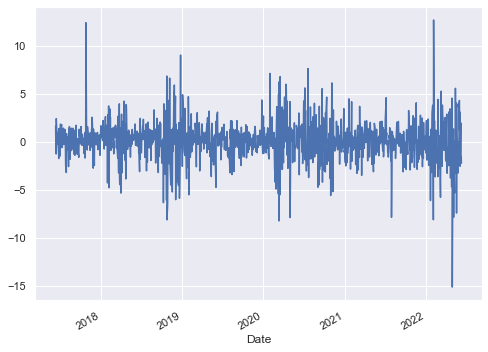

In [31]:
#plot the series
amzn_return.plot()

<AxesSubplot:xlabel='Date'>

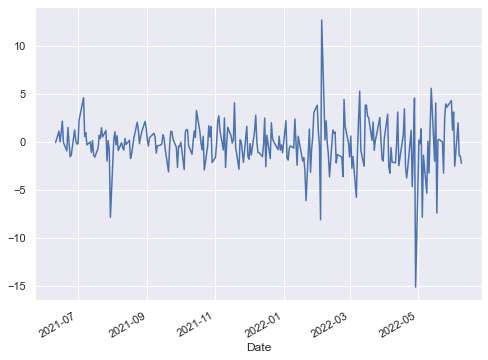

In [32]:
#plot the series for one year interval
amzn_return[-252:].plot()

In [33]:
#descriptive statistics
amzn_return.dropna(inplace = True)
amzn_return.describe()

count    1258.000000
mean        0.071455
std         2.079317
min       -15.140000
25%        -0.867500
50%         0.130000
75%         1.100000
max        12.690000
Name: Close, dtype: float64

In [34]:
from scipy import stats

In [35]:
stats.describe(amzn_return)


DescribeResult(nobs=1258, minmax=(-15.14, 12.69), mean=0.07145468998410176, variance=4.323560730244494, skewness=-0.17922058443646968, kurtosis=5.876452641441029)

In [36]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
#mean
minmax

(-15.14, 12.69)

In [37]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5

In [38]:
#generate random numbers the follow normal distribution
from scipy.stats import norm

(array([  1.,   0.,   0.,   6.,   7.,  23.,  99., 343., 580., 139.,  44.,
         12.,   1.,   1.,   2.]),
 array([-15.14      , -13.28466667, -11.42933333,  -9.574     ,
         -7.71866667,  -5.86333333,  -4.008     ,  -2.15266667,
         -0.29733333,   1.558     ,   3.41333333,   5.26866667,
          7.124     ,   8.97933333,  10.83466667,  12.69      ]),
 <BarContainer object of 15 artists>)

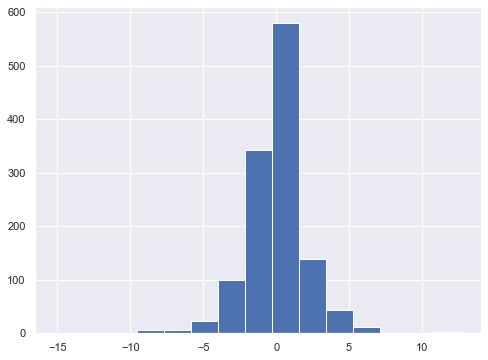

In [39]:
plt.hist(amzn_return, bins = 15)

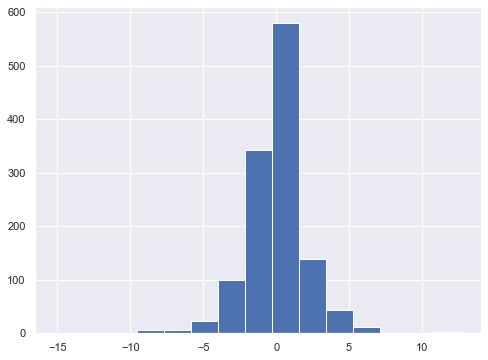

In [40]:
plt.hist(amzn_return, bins = 15);

In [41]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)

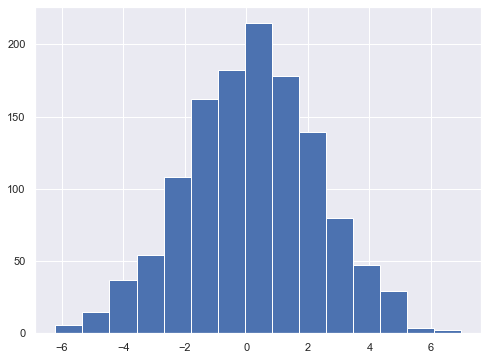

In [42]:
plt.hist(x, bins = 15);

In [43]:
# using scipy stats to test for kurtosis, the null hypothesis is that the sample is 
# is drawn froma population where the underlying kurtosis is that of a normally distributed variable
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:            -0.93          0.3504
AMZN:         12.82          0.0000


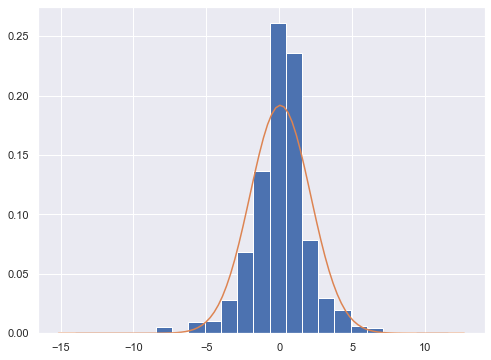

In [44]:
#plot histogram of price changes with normal curve overlay
plt.hist(amzn_return, bins = 25, edgecolor = 'w', density = True);
overlay = np.linspace(mini, maxi, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std));

In [45]:
#is daily price change significantly different from zero
#conduct simple hypthesis test
stats.ttest_1samp(amzn_return, 0, alternative = 'two-sided')

Ttest_1sampResult(statistic=1.2188500460432627, pvalue=0.22312979857914694)

In [46]:
stats.ttest_1samp(amzn_return.sample(252), 0, alternative = 'two-sided')

Ttest_1sampResult(statistic=0.026894671314802967, pvalue=0.9785651140257234)

In [47]:
#can price movement be described as a random walk
#create price lags: forecast tomorrow's price with today
amzn_close = pd.DataFrame(amzn_close, columns = ['Close'])
amzn_close['lag_1'] = amzn_close.Close.shift(1)
amzn_close['lag_2'] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close.head()

,Close,lag_1,lag_2
Date,,,
2017-06-14,48.823502,49.039501,48.245499
2017-06-15,48.208500,48.823502,49.039501
2017-06-16,49.385502,48.208500,48.823502
2017-06-19,49.758499,49.385502,48.208500
2017-06-20,49.629501,49.758499,49.385502


In [48]:
amzn_close.tail()

,Close,lag_1,lag_2
Date,,,
2022-06-03,122.349998,125.511002,121.683998
2022-06-06,124.790001,122.349998,125.511002
2022-06-07,123.000000,124.790001,122.349998
2022-06-08,121.180000,123.000000,124.790001
2022-06-09,118.490799,121.180000,123.000000


In [62]:
np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close.Close, rcond = None)[0]

array([0.95923509, 0.04089072])

In [63]:
#use linear regression model in numpy
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close.Close, rcond = None)[0]

In [64]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1','lag_2']], lr)
amzn_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2017-06-14,48.823502,49.039501,48.245499,49.013204
2017-06-15,48.208500,48.823502,49.039501,48.838477
2017-06-16,49.385502,48.208500,48.823502,48.239713
2017-06-19,49.758499,49.385502,48.208500,49.343587
2017-06-20,49.629501,49.758499,49.385502,49.749507


In [65]:
amzn_close.tail()

,Close,lag_1,lag_2,predict
Date,,,,
2022-06-03,122.349998,125.511002,121.683998,125.370304
2022-06-06,124.790001,122.349998,125.511002,122.494647
2022-06-07,123.000000,124.790001,122.349998,124.705928
2022-06-08,121.180000,123.000000,124.790001,123.088669
2022-06-09,118.490799,121.180000,123.000000,121.269667


<AxesSubplot:xlabel='Date'>

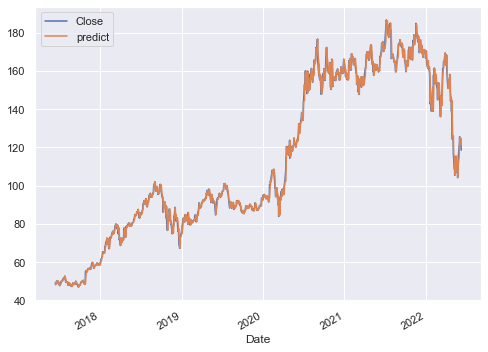

In [66]:
amzn_close[['Close', 'predict']].plot()

<AxesSubplot:xlabel='Date'>

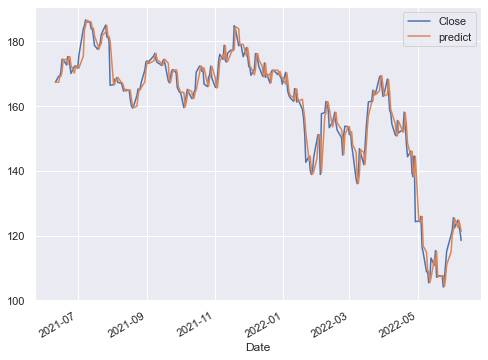

In [67]:
amzn_close.iloc[-252:][['Close', 'predict']].plot()